In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [28]:
data = pd.read_csv('datasets/data2.csv')

df_data = data
df_data.head()

,Sell,Buy,Updated_at
0,911924,895965,2022-05-13
1,915896,899867,2022-05-12
2,916307,900271,2022-05-11
3,917879,901816,2022-05-10
4,918811,902731,2022-05-09


In [29]:
df_data['Updated_at'] = df_data['Updated_at'].astype("datetime64")
 
# Setting the Date as index
df_data = df_data.set_index('Updated_at')
df_data

,Sell,Buy
Updated_at,,
2022-05-13,911924,895965
2022-05-12,915896,899867
2022-05-11,916307,900271
2022-05-10,917879,901816
2022-05-09,918811,902731
...,...,...
2017-05-19,554000,545500
2017-05-18,554500,546000
2017-05-17,556000,547500


In [30]:
df_data.shape

(1946, 2)

In [31]:
df_data.columns

Index(['Sell', 'Buy'], dtype='object')

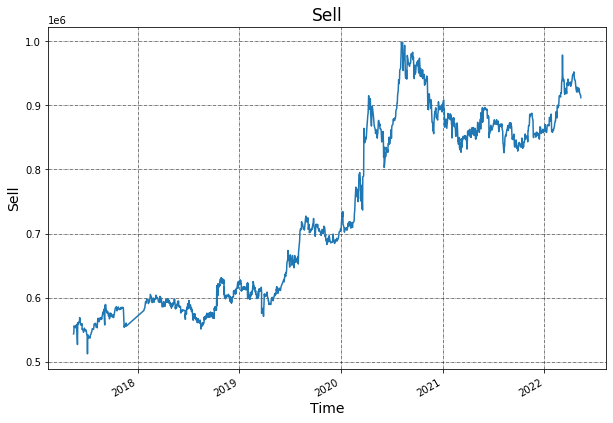

In [32]:
df_data['Sell'].plot(figsize=(10, 7))
plt.title("Sell", fontsize=17)
plt.ylabel('Sell', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# Test Train Set

In [34]:
def create_train_test_set(df_data):
    
    features = df_data.drop(columns=['Sell'], axis=1)
    target = df_data['Sell']
    

    data_len = df_data.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [35]:
std_scaler = StandardScaler()
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_data)

Historical Stock Data length is -  1946
Training Set length -  1712
Validation Set length -  194
Test Set length -  38
(1712, 1) (194, 1) (40, 1)
(1712,) (194,) (40,)


# Prediction using Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [37]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [0.96806981]
LR Intercept: 
 46624.1251030257


# Evaluation

In [38]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9979501485013431


In [39]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Predict for the test dataset

In [40]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [41]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

# print(' ')

# print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
# print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
# print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
# print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
# print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
# print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.69
Training Mean Squared Error: 39066536.99
Training RMSE:  6250.32
Training MAE:  4821.65
 
Test R-squared:  -3.16
Test Explained Variation:  1.0
Test MAPE: 3.82
Test Mean Squared Error: 442914471.31
Test RMSE:  21045.53
Test MAE:  21039.63


In [42]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
# df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Updated_at,Actual,Predicted
0,2018-04-17,596364,606626.375193
1,2018-04-16,595550,605862.568109
2,2018-04-16,596163,606437.601579
3,2018-04-16,593090,603551.785460
4,2018-04-16,593090,603551.785460
...,...,...,...
189,2017-07-14,541000,562605.336495
190,2017-07-13,537000,558733.057235
191,2017-07-12,539000,560669.196865
192,2017-07-11,538500,560185.161958


# Plot Predicted vs Actual Prices on Time Series plot

<AxesSubplot:>

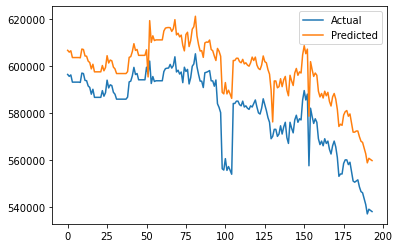

In [43]:
df_pred[['Actual', 'Predicted']].plot()

In [45]:
df_pred.to_csv('hasilpred.csv', index=False)